In [1]:
#importing required libraies
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
from pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42

###  Loading All Dataset

In [2]:
df_1 = pd.read_csv("1_label.csv")
df_2 = pd.read_csv("2_label.csv")
df_3 = pd.read_csv("3_label.csv")
df_4 = pd.read_csv("4_label.csv")
df_5 = pd.read_csv("5_label.csv")
df_6 = pd.read_csv("6_label.csv")
df_7 = pd.read_csv("7_label.csv")
df_8 = pd.read_csv("8_label.csv")
df_9 = pd.read_csv("9_label.csv")

frames = [df_1, df_2, df_3,df_4, df_5, df_6,df_7, df_8, df_9]

df = pd.concat(frames)


### Checking the properties of the dataset

In [3]:
df.head(10)

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628396340,-0.246582,-0.989258,0.291504,8.056641,-3.234863,-9.277344,-169.5,-64.5,-475.5,1
1,1628396340,-0.237305,-1.012695,0.256836,7.812500,3.967285,-9.399414,-196.5,-57.0,-471.0,1
2,1628396340,-0.238769,-0.988770,0.274414,7.019043,5.554199,-10.253906,-198.0,-67.5,-465.0,1
3,1628396340,-0.243652,-0.967285,0.297363,6.103516,5.859375,-10.437012,-180.0,-49.5,-483.0,1
4,1628396340,-0.255371,-0.977051,0.305176,3.723145,5.126953,-9.948730,-192.0,-46.5,-468.0,1
5,1628396340,-0.249512,-0.979004,0.304199,1.159668,3.784180,-11.230469,-204.0,-61.5,-478.5,1
6,1628396340,-0.241699,-0.965332,0.314453,-1.892090,1.464844,-12.268066,-213.0,-61.5,-478.5,1
7,1628396340,-0.232910,-0.968262,0.318359,-4.638672,1.037598,-14.709473,-205.5,-66.0,-469.5,1
8,1628396340,-0.230469,-0.977539,0.320312,-9.521484,-0.488281,-15.075683,-199.5,-60.0,-466.5,1
9,1628396340,-0.227051,-0.963867,0.326660,-13.366699,-1.281738,-16.906738,-199.5,-60.0,-457.5,1


In [4]:
df.shape

(12509332, 11)

In [5]:
df.dropna()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628396340,-0.246582,-0.989258,0.291504,8.056641,-3.234863,-9.277344,-169.5,-64.5,-475.5,1
1,1628396340,-0.237305,-1.012695,0.256836,7.812500,3.967285,-9.399414,-196.5,-57.0,-471.0,1
2,1628396340,-0.238769,-0.988770,0.274414,7.019043,5.554199,-10.253906,-198.0,-67.5,-465.0,1
3,1628396340,-0.243652,-0.967285,0.297363,6.103516,5.859375,-10.437012,-180.0,-49.5,-483.0,1
4,1628396340,-0.255371,-0.977051,0.305176,3.723145,5.126953,-9.948730,-192.0,-46.5,-468.0,1
...,...,...,...,...,...,...,...,...,...,...,...
219731,1628330340,-0.231445,0.967773,0.025879,-0.305176,-2.014160,-1.708984,-238.5,1369.5,571.5,9
219732,1628330340,-0.227051,0.971191,0.031738,-0.305176,-3.540039,-1.892090,-244.5,1365.0,559.5,9
219733,1628330340,-0.225098,0.965820,0.023926,-0.549316,-2.624512,-2.014160,-259.5,1354.5,555.0,9
219734,1628330340,-0.218262,0.966309,0.022461,-0.976563,-2.136230,-1.159668,-234.0,1345.5,561.0,9


In [6]:
df.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
count,1.250933e+07,1.250933e+07,1.250933e+07,1.250933e+07,1.250933e+07,1.250933e+07,1.250933e+07,1.250933e+07,1.250933e+07,1.250933e+07,1.250933e+07
mean,1.628364e+09,-5.054754e-02,5.312525e-01,1.181565e-01,8.439847e-01,-1.871119e+00,-7.005537e-01,-2.778564e+02,4.218425e+02,2.085002e+02,4.088654e+00
std,4.897022e+04,2.496902e-01,7.858745e-01,1.861948e-01,1.395685e+01,2.244065e+01,1.139085e+01,2.509533e+02,5.991334e+02,4.371694e+02,2.322752e+00
min,1.628079e+09,-1.599756e+01,-1.599805e+01,-1.599756e+01,-1.999756e+03,-1.986816e+03,-1.969482e+03,-1.186500e+03,-1.057500e+03,-1.152000e+03,1.000000e+00
25%,1.628328e+09,-2.246094e-01,7.451172e-01,4.101560e-02,-2.441406e+00,-6.652832e+00,-3.051758e+00,-4.215000e+02,-5.850000e+01,1.395000e+02,1.000000e+00
50%,1.628343e+09,-5.664060e-02,9.384766e-01,1.303711e-01,7.934571e-01,-2.014160e+00,-6.713868e-01,-2.340000e+02,1.140000e+02,3.270000e+02,4.000000e+00
75%,1.628406e+09,1.123047e-01,9.765626e-01,2.104492e-01,3.967285e+00,2.624512e+00,1.708984e+00,-1.230000e+02,1.008000e+03,5.370000e+02,6.000000e+00
max,1.628426e+09,1.171582e+01,1.599170e+01,1.599854e+01,1.999756e+03,1.999939e+03,1.888306e+03,7.920000e+02,1.918500e+03,1.179000e+03,9.000000e+00


### Visualisation

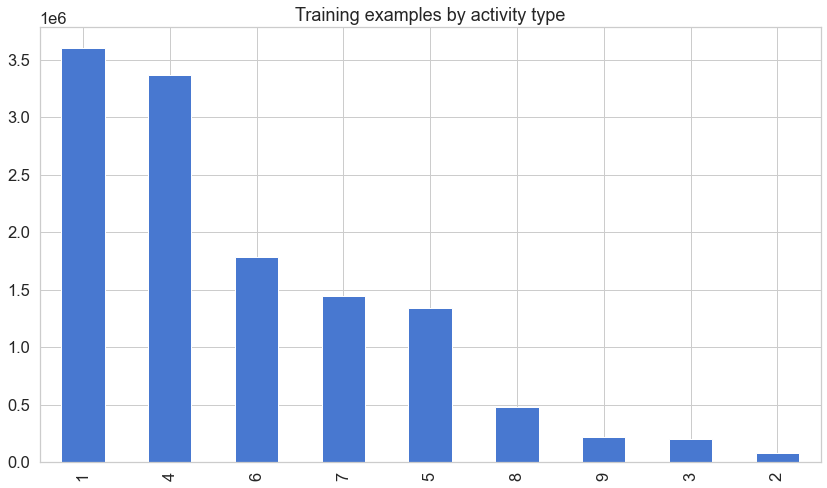

In [7]:
df['label'].value_counts().plot(kind='bar', title='Training examples by activity type');


In [ ]:
def plot_activity(label, df):
    data = df[df['label'] == label][['acc_x','acc_y','acc_z','gyr_x','gyr_y','gyr_z','mag_x','mag_y','mag_z']][:200]
    axis = data.plot(subplots=True, figsize=(16, 12),title=label)
    for ax in axis:
        ax.legend(loc='lower left', bbox_to_anchor=(1.0, 0.5))
plot_activity(9, df)

In [ ]:
plot_activity(1, df)

In [ ]:
plot_activity(3, df)

In [ ]:
plot_activity(4, df)

### Data preprocessing


In [8]:
N_TIME_STEPS = 200
N_FEATURES = 9
step = 20
segments = []
labels = []
for i in range(0, len(df) - N_TIME_STEPS, step):
    ax = df['acc_x'].values[i: i + N_TIME_STEPS]
    ay = df['acc_y'].values[i: i + N_TIME_STEPS]
    az = df['acc_z'].values[i: i + N_TIME_STEPS]
    gx = df['gyr_x'].values[i: i + N_TIME_STEPS]
    gy = df['gyr_y'].values[i: i + N_TIME_STEPS]
    gz = df['gyr_z'].values[i: i + N_TIME_STEPS]
    mx = df['mag_x'].values[i: i + N_TIME_STEPS]
    my = df['mag_y'].values[i: i + N_TIME_STEPS]
    mz = df['mag_z'].values[i: i + N_TIME_STEPS]
    
    label = stats.mode(df['label'][i: i + N_TIME_STEPS])[0][0]
    segments.append([ax,ay,az,gx,gy,gz,mx,my,mz])
    labels.append(label)


In [9]:
np.array(segments).shape

(625457, 9, 200)

In [10]:
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, N_TIME_STEPS, N_FEATURES)
labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [11]:
reshaped_segments.shape


(625457, 200, 9)

In [12]:
labels.shape

(625457, 9)

In [ ]:
labels[0]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
        reshaped_segments, labels, test_size=0.2, random_state=RANDOM_SEED)

In [ ]:
print(X_train.shape)
print(y_train.shape)

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,LSTM,Dropout


In [ ]:

model = tf.keras.Sequential()
model.add(LSTM(64,input_shape=(N_TIME_STEPS,N_FEATURES)))
model.add(Dropout(0.5))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(5,activation = 'softmax'))

model.summary()

In [ ]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=50, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)

In [ ]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

y_pred=model.predict(X_test)

#### Getting some dimension error in Xtrain and ytrain, the dimensions are mismatching
Thank you